## Data Analysis for Final Project

#### Tittle: Synthesis of Sodalite Through Modification of Coal Fly Ash with CTAB (Cetyltrimethylammonium Bromide) for the Adsorption of Methyl Orange Dye 

Created by: Ricky Fasha Setiawan (NIM 20/462246/PA/20218)

This code contains FTIR and SEM molecular pore distribution, and BET data analysis of CFA-S and CFA-S-CTAB Study

#### 1. Data Cleaning

In [14]:
import pandas as pd

# Load the CSV file into a DataFrame
df_CFA_S = pd.read_csv('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/FTIR/Sampel-CFA-5.csv')

# Assuming the "Data" column contains full names separated by space
df_CFA_S[['Units', 'A']] = df_CFA_S['Data'].str.split(expand=True)

# Drop the original "Data" column if you no longer need it
df_CFA_S = df_CFA_S.drop('Data', axis=1)

# Save the modified DataFrame to a new CSV file
df_CFA_S.to_csv('output_file_CFA_S.csv', index=False)
df_CFA_S.head()

,Units,A
0,293.180032,10.543270
1,300.895296,22.932548
2,308.610560,75.994923
3,316.325824,53.289548
4,324.041088,54.483714


In [15]:
import pandas as pd

# Load the CSV file into a DataFrame
df_CFA_CTAB_S = pd.read_csv('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Spectro Data/FTIR/Sampel-CFA-CTAB-5.csv')

# Assuming the "Data" column contains full names separated by space
df_CFA_CTAB_S[['Units', 'A']] = df_CFA_CTAB_S['Data'].str.split(expand=True)

# Drop the original "Data" column if you no longer need it
df_CFA_CTAB_S = df_CFA_CTAB_S.drop('Data', axis=1)

# Save the modified DataFrame to a new CSV file
df_CFA_CTAB_S.to_csv('output_file_CFA_CTAB_S.csv', index=False)
df_CFA_CTAB_S.head()

,Units,A
0,293.180032,23.346567
1,300.895296,7.847679
2,308.610560,46.745470
3,316.325824,56.709609
4,324.041088,22.369752


#### 2. FTIR Analysis

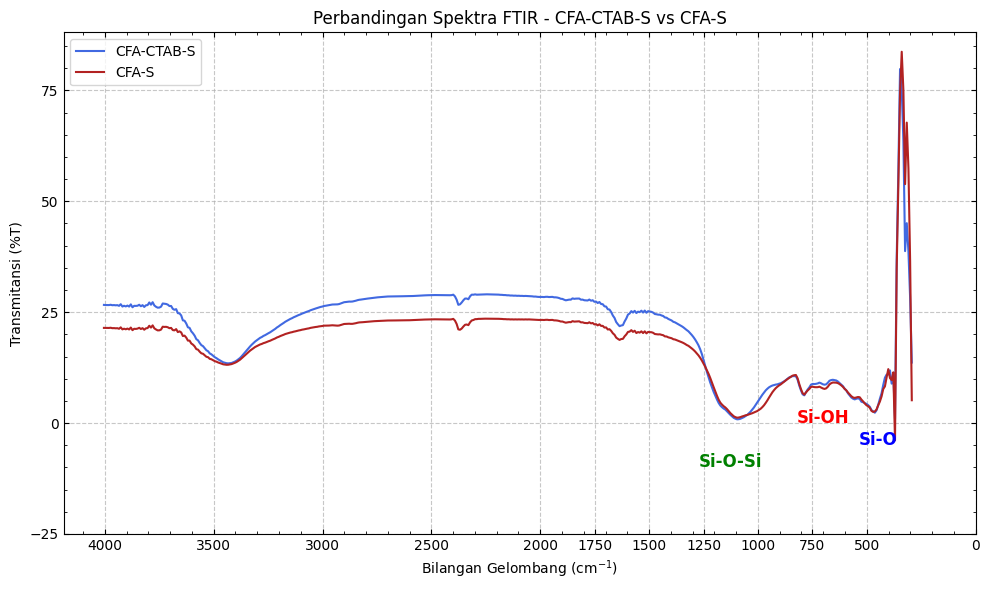

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# Load the CSV files into DataFrames
df_CFA_CTAB_S = pd.read_csv('output_file_CFA_CTAB_S.csv')
df_CFA_S = pd.read_csv('output_file_CFA_S.csv')

# Reduce the smoothing effect for a sharper appearance
window_size = 7
poly_order = 2
df_CFA_CTAB_S['Smoothed_A'] = savgol_filter(df_CFA_CTAB_S['A'], window_size, poly_order)
df_CFA_S['Smoothed_A'] = savgol_filter(df_CFA_S['A'], window_size, poly_order)

# Plot FTIR spectra
plt.figure(figsize=(10, 6))

# Plot CFA_CTAB_S in blue
plt.plot(df_CFA_CTAB_S['Units'], df_CFA_CTAB_S['Smoothed_A'], label='CFA-CTAB-S', color='royalblue', linewidth=1.5)

# Plot CFA_S in red
plt.plot(df_CFA_S['Units'], df_CFA_S['Smoothed_A'], label='CFA-S', color='firebrick', linewidth=1.5)

# Customize the plot
plt.xlabel('Bilangan Gelombang (cm$^{-1}$)')
plt.ylabel('Transmitansi (%T)')  
plt.title('Perbandingan Spektra FTIR - CFA-CTAB-S vs CFA-S')
plt.legend()

# Adjust x-axis range and scale, and reverse the x-axis
xticks_values = [4000, 3500, 3000, 2500, 2000, 1750, 1500, 1250, 1000, 750, 500, 0][::-1]
plt.xticks(xticks_values)

# Adjust y-axis range and scale
plt.yticks(np.arange(-25, 100, 25))

# Additional styling for better readability
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.minorticks_on()

# Reverse the x-axis
plt.gca().invert_xaxis()

# Add Si-O-Si annotation (bold)
plt.text(1125, -10, 'Si-O-Si', fontsize=12, ha='center', weight='bold', color='green')
# Add Si-OH annotation (bold)
plt.text(700, 0, 'Si-OH', fontsize=12, ha='center', weight='bold', color='red')
# Add Si-O annotation (bold)
plt.text(450, -5, 'Si-O', fontsize=12, ha='center', weight='bold', color='blue')

plt.tight_layout()

# Save or show the plot
plt.show()


#### 3. SEM

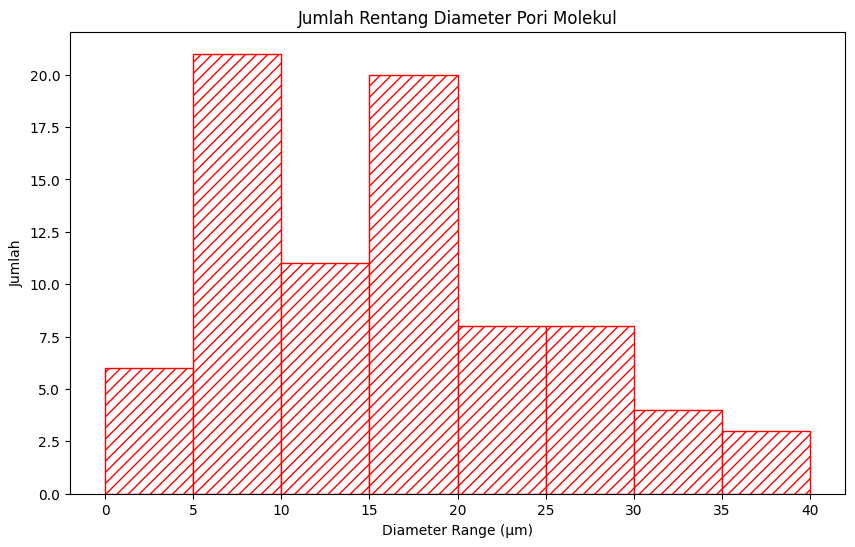

In [86]:
import matplotlib.pyplot as plt

# Data
ranges = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']
frequencies = [6, 21, 11, 20, 8, 8, 4, 3]

# Calculate bin edges for the histogram
bin_edges = [0, 5, 10, 15, 20, 25, 30, 35, 40]

# Plotting the histogram with frequency and range labels
plt.figure(figsize=(10, 6))
plt.hist(bin_edges[:-1], bin_edges, weights=frequencies, edgecolor='red', color='white', hatch='///')

# Customize the plot
plt.xlabel('Diameter Range (μm)')
plt.ylabel('Jumlah')
plt.title('Jumlah Rentang Diameter Pori Molekul')

# Show the plot
plt.show()


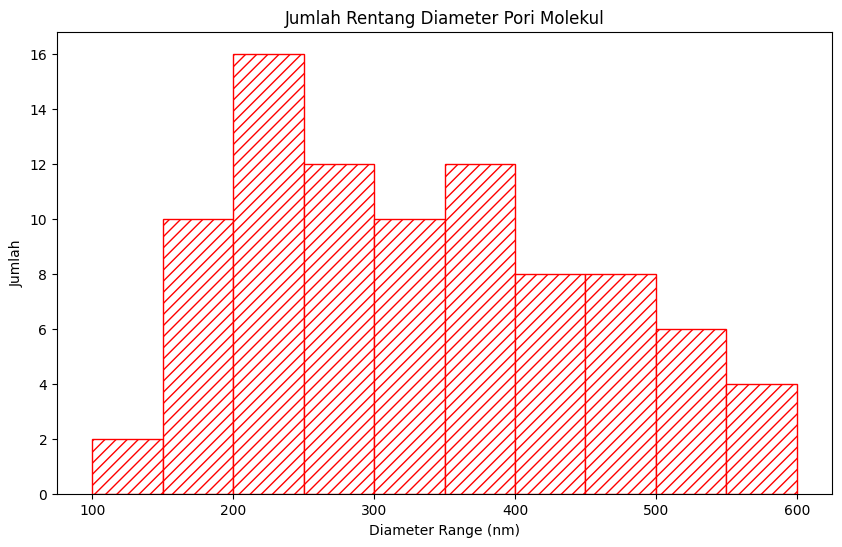

In [92]:
import matplotlib.pyplot as plt

# Data
diameters = ['100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500-550', '550-600']
frequencies = [2, 10, 16, 12, 10, 12, 8, 8, 6, 4]

# Calculate bin edges for the histogram
bin_edges = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]

# Plotting the histogram with frequency and range labels
plt.figure(figsize=(10, 6))
plt.hist(bin_edges[:-1], bin_edges, weights=frequencies, edgecolor='red', color='white', hatch='///')

# Customize the plot
plt.xlabel('Diameter Range (nm)')
plt.ylabel('Jumlah')
plt.title('Jumlah Rentang Diameter Pori Molekul')

# Show the plot
plt.show()


#### 4. BET

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_cfa_s = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Code/Isoterm CFA-S.xlsx')
df_cfa_s_ctab = pd.read_excel('C:/Users/hp/Documents/Gadjah Mada University/Semester 7 & 8/Data Analysis/Code/Isoterm CFA-S-CTAB.xlsx')

df_cfa_s.head()


,Relative Pressure Ads,Volume Adsorbed at STP cc/g,Relative Pressure Des,Volume Desorbed at STP cc/g
0,0.050570,5.85719,0.945915,74.84150
1,0.148287,6.86521,0.851918,41.91710
2,0.248307,7.34958,0.754058,22.65160
3,0.350877,7.85614,0.650641,12.74680
4,0.449213,8.38009,0.553296,9.85005


In [100]:
df_cfa_s_ctab.head()

,Relative Pressure Ads,Volume Adsorbed at STP cc/g,Relative Pressure Des,Volume Desorbed at STP cc/g
0,0.048216,10.6227,0.946352,89.4148
1,0.148221,13.6961,0.853860,68.4408
2,0.247354,15.8154,0.754421,50.0206
3,0.347357,18.0506,0.653814,36.5760
4,0.446096,20.6179,0.550367,26.8773


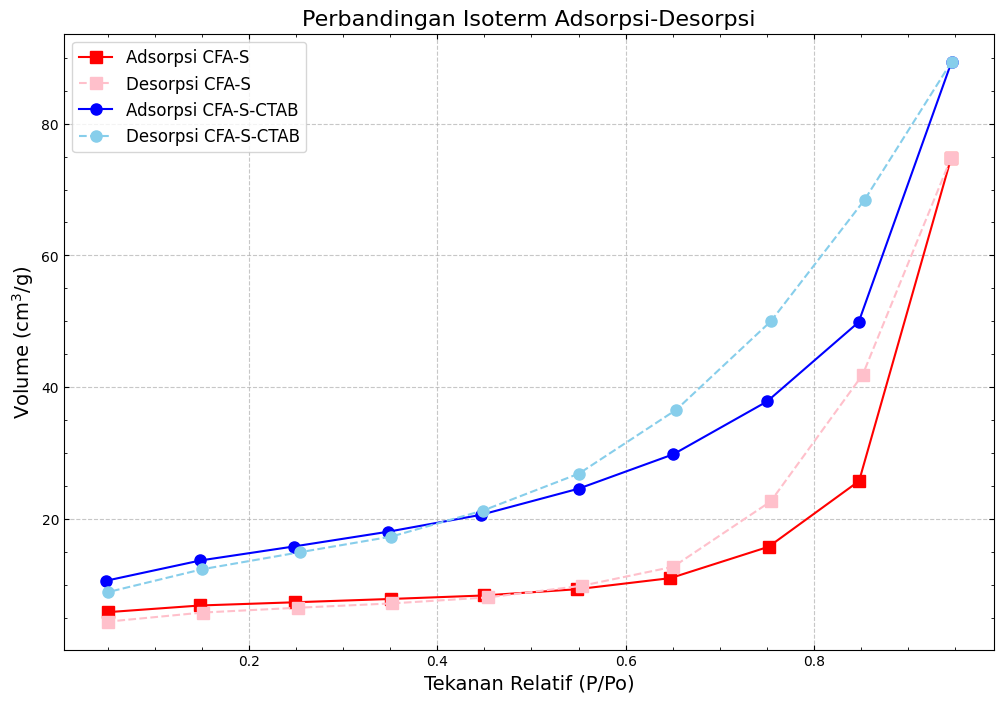

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df_cfa_s = pd.read_excel('Isoterm CFA-S.xlsx')
df_cfa_s_ctab = pd.read_excel('Isoterm CFA-S-CTAB.xlsx')

# Plot Adsorption and Desorption Lines
plt.figure(figsize=(12, 8))

# CFA-S Lines
plt.plot(df_cfa_s['Relative Pressure Ads'], df_cfa_s['Volume Adsorbed at STP cc/g'],
         label='Adsorpsi CFA-S', marker='s', linestyle='-', color='red', markersize=8)
plt.plot(df_cfa_s['Relative Pressure Des'], df_cfa_s['Volume Desorbed at STP cc/g'],
         label='Desorpsi CFA-S', marker='s', linestyle='--', color='pink', markersize=8)

# CFA-S-CTAB Lines
plt.plot(df_cfa_s_ctab['Relative Pressure Ads'], df_cfa_s_ctab['Volume Adsorbed at STP cc/g'],
         label='Adsorpsi CFA-S-CTAB', marker='o', linestyle='-', color='blue', markersize=8)
plt.plot(df_cfa_s_ctab['Relative Pressure Des'], df_cfa_s_ctab['Volume Desorbed at STP cc/g'],
         label='Desorpsi CFA-S-CTAB', marker='o', linestyle='--', color='skyblue', markersize=8)

# Customize the plot
plt.xlabel('Tekanan Relatif (P/Po)', fontsize=14)
plt.ylabel('Volume (cm$^3$/g)', fontsize=14)
plt.title('Perbandingan Isoterm Adsorpsi-Desorpsi', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.minorticks_on()

# Show the plot
plt.show()
